<a href="https://colab.research.google.com/github/PrasannaWorkshop/Regression/blob/main/Regression_Boston_Housing_using_Statsmodel_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plan


1.   Read the Data
2.   Explore the Data
3.   Perform Exploratory Data Analysis
4.   Treat outlier if any
5.   Split Data into Train and Test
6.   Train the model using Statsmodels Regression
7.   State the Classical Linear Regression Model (CLRM)
8.   Check if our model and data meets CLRM assumption  and rectify if any violations
9.   Model equation and our interpretation



# Data Description



*   crim: Per capita crime rate by town.
*   zn: Proportion of residential land zoned for large lots (over 25,000 sq. ft.)
*   indus: Proportion of non-retail business acres per town.
*   chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
*   nox: Nitric oxides concentration (parts per 10 million).
*   rm: Average number of rooms per dwelling.
*   age: Proportion of owner-occupied units built prior to 1940.
*   dis: Weighted distances to five Boston employment centers.
*   rad: Index of accessibility to radial highways.
*   tax: Full-value property-tax rate per $10,000.
*   PTRATIO - pupil-teacher ratio by town


*   B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's



This dataset provides valuable insights into the housing market dynamics and socio-economic factors influencing property values in Boston.




# Import Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visulaization
import seaborn as sns
import matplotlib.pyplot as plt

# for imputing missing values
from sklearn.impute import SimpleImputer

# Train Test Split
from sklearn.model_selection import train_test_split

# Stats model Linear Regression
from statsmodels.regression.linear_model import OLS

# Read the Data

In [2]:
from google.colab import files
import io

In [3]:
try :
  uploaded
except NameError :
  uploaded = files.upload()

Saving HousingData.csv to HousingData.csv


In [4]:
houseing_df = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))

In [5]:
houseing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
#checking the shape of the data
houseing_df.shape

(506, 14)

## Conclusion
* Data has been loaded succesfully
* There are 506 rows and 14 columns

# Data Check

### Check the Datatype of the columns

In [7]:
houseing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Check for Null

In [8]:
null_columns = houseing_df.isnull().sum()

In [9]:
null_columns = null_columns[ null_columns > 0 ]

In [10]:
type(null_columns)

pandas.core.series.Series

In [11]:
null_columns.rename( 'Null_Count' )

,Null_Count
CRIM,20
ZN,20
INDUS,20
CHAS,20
AGE,20
LSTAT,20


In [12]:
houseing_df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [13]:
houseing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [14]:
houseing_df.skew()

,0
CRIM,5.212843
ZN,2.256613
INDUS,0.303722
CHAS,3.382293
NOX,0.729308
RM,0.403612
AGE,-0.582470
DIS,1.011781
RAD,1.004815
TAX,0.669956


### Check for Duplicate rows

In [15]:
houseing_df.duplicated().sum()

np.int64(0)

## Conclusion and Inference


*   Few columns have nulls
*   There are no duplicate rows
*   Most of the columns are skewed ie - indicates that outliers are present



# Data Preprocessing and Cleaning

In [16]:
houseing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Treating null values

In [17]:
houseing_df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [18]:
houseing_df[ houseing_df.isna().any(axis =1 ) ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [19]:
mask = houseing_df.isna().any(axis =1 )

In [20]:
houseing_df['CRIM'] = houseing_df['CRIM'].fillna(houseing_df['CRIM'].median())
houseing_df['ZN'] = houseing_df['ZN'].fillna(houseing_df['ZN'].median())
houseing_df['INDUS'] = houseing_df['INDUS'].fillna(houseing_df['INDUS'].median())
houseing_df['CHAS'] = houseing_df['CHAS'].fillna(houseing_df['CHAS'].median())
houseing_df['AGE'] = houseing_df['AGE'].fillna(houseing_df['AGE'].median())
houseing_df['LSTAT'] = houseing_df['LSTAT'].fillna(houseing_df['LSTAT'].median())

In [21]:
houseing_df[mask]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,11.43,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,11.43,29.8
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4


## Replace missing values with Median

In [22]:
houseing_df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Conclusion


*   Missing Data has been treated



# Exploratory Data Analysis (EDA)

## Univariate data analysis

In [23]:
houseing_df['CRIM']

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [24]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

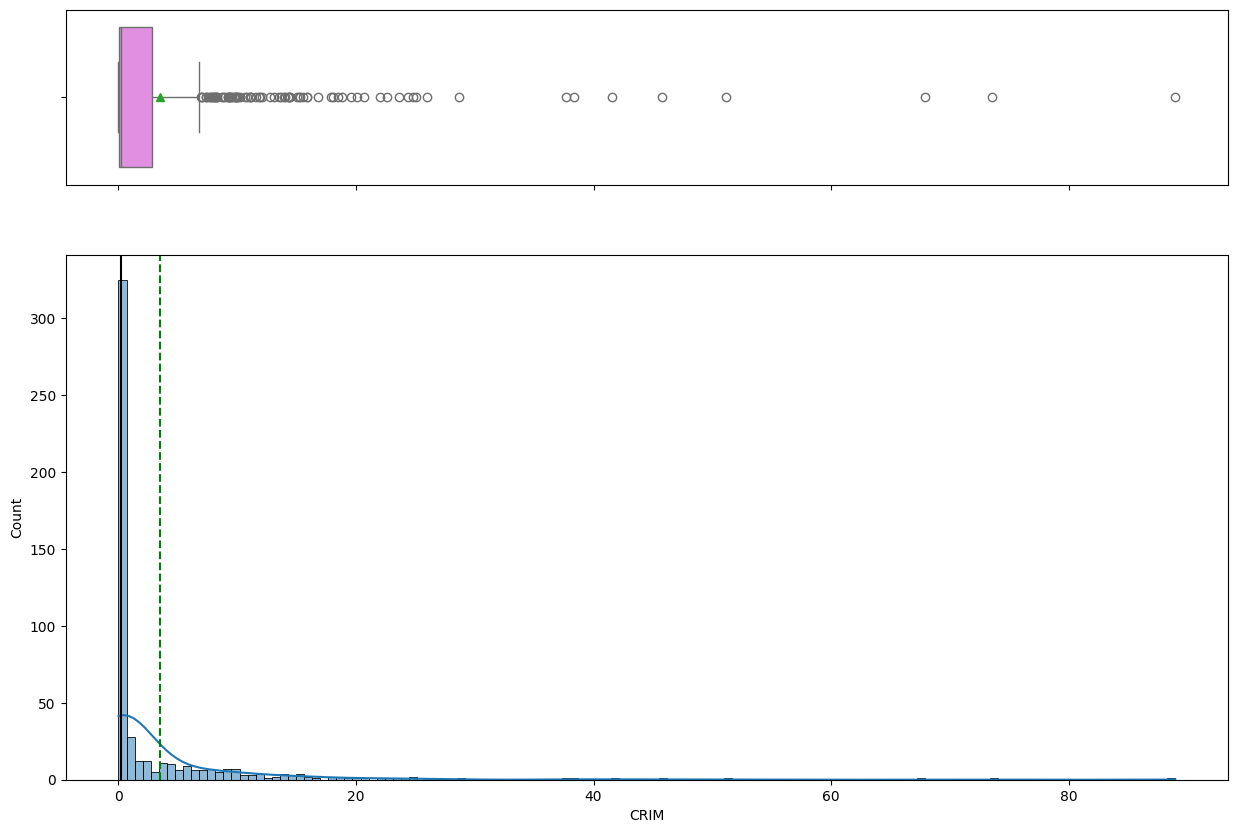

In [25]:
histogram_boxplot(houseing_df ,'CRIM')

## Inference
CRIM
Crim  ( Per capita rate by town ) is right skewed .
The distribution shows that most of the area have low crime rate , with few area having higher crime rate values
These are outlier and needed to be treated

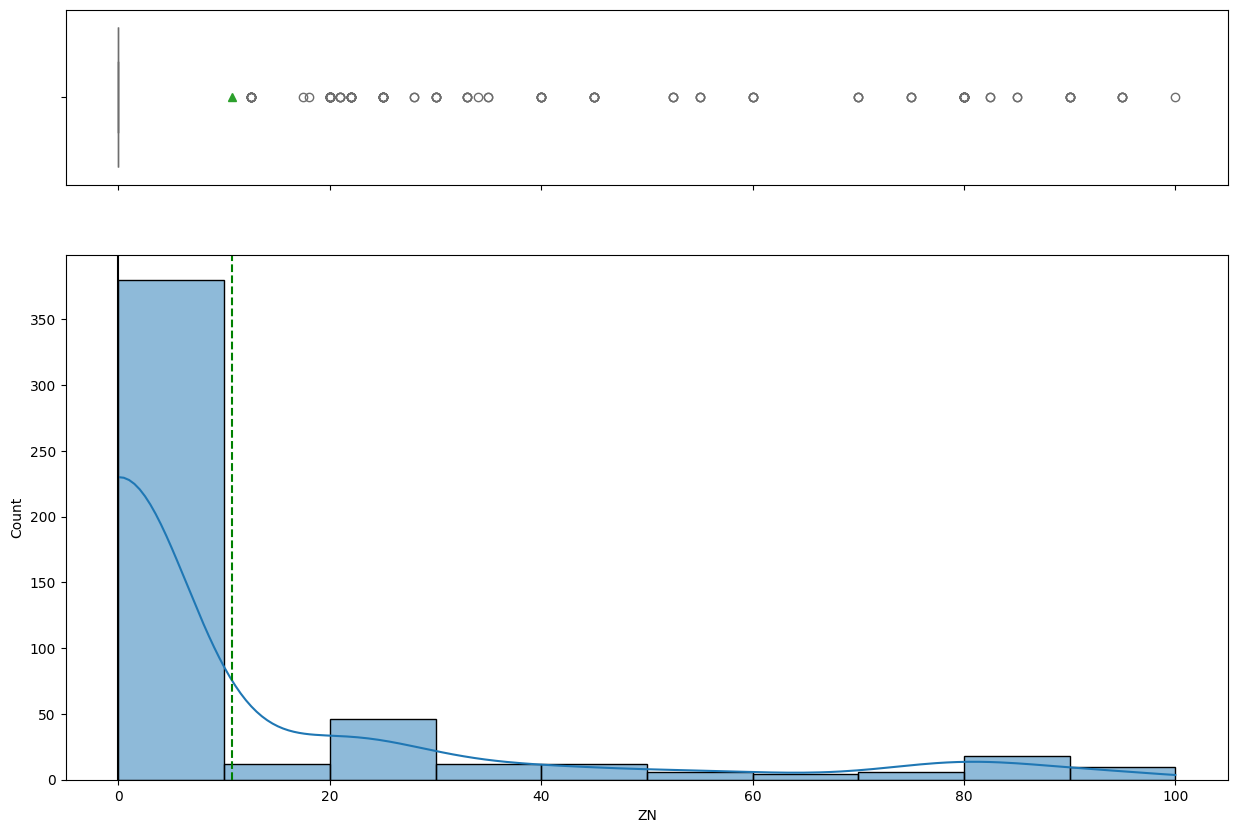

In [26]:
histogram_boxplot(houseing_df ,'ZN')

## Infernce
zn: Proportion of residential land zoned for large lots (over 25,000 sq. ft.)
The ZN is right skewed .
Meaning most of the area having zn proption to zero indicating that there are very less land that is reserved for large lots over 25000sqft ,ie most of the land are of small lots  

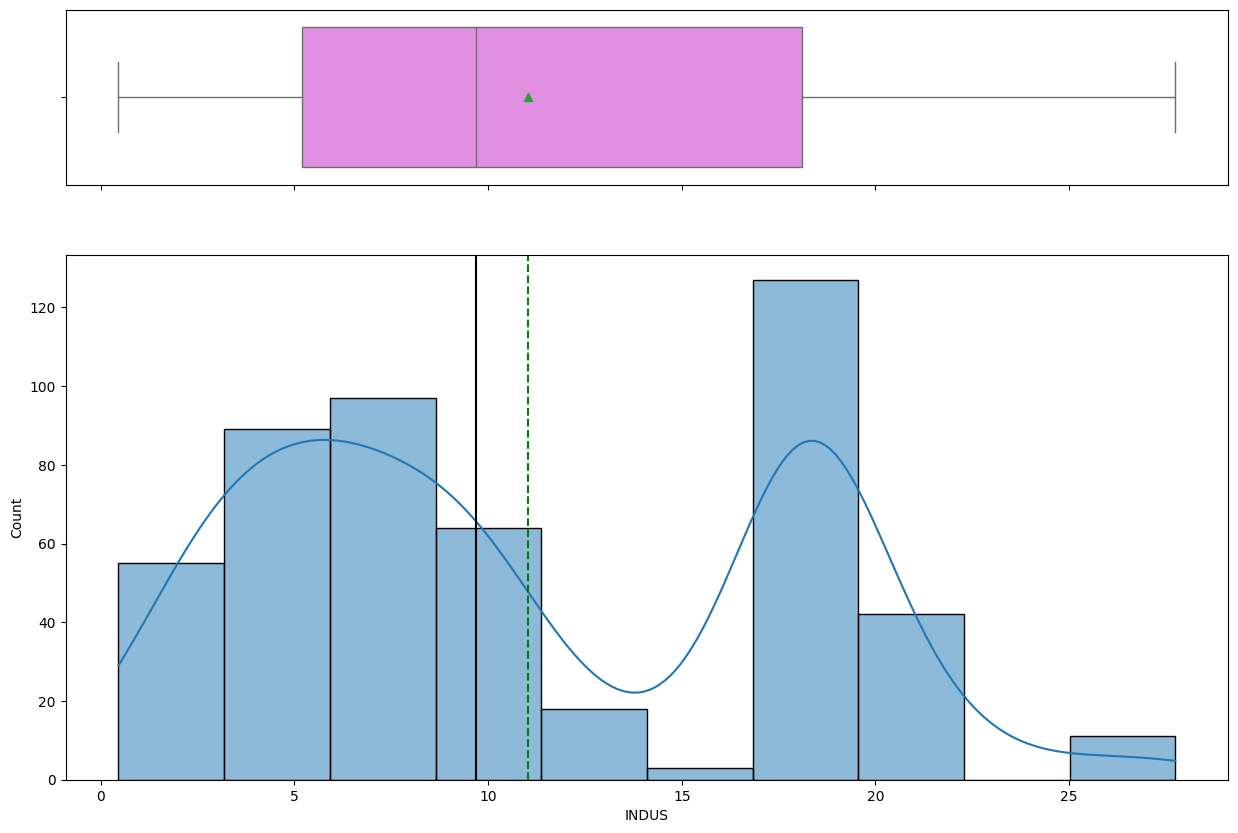

In [27]:
histogram_boxplot(houseing_df ,'INDUS')

## Infernce
Indus (Proportion of non-retail business acres per town.)
From the histogram we see that the Indus is bimodal ( 3-9 and 18-20)
The distribution is complex which is not symetric nor it is skewed
This means that few areas  might have more proption of non-retial business or few might have less proption.

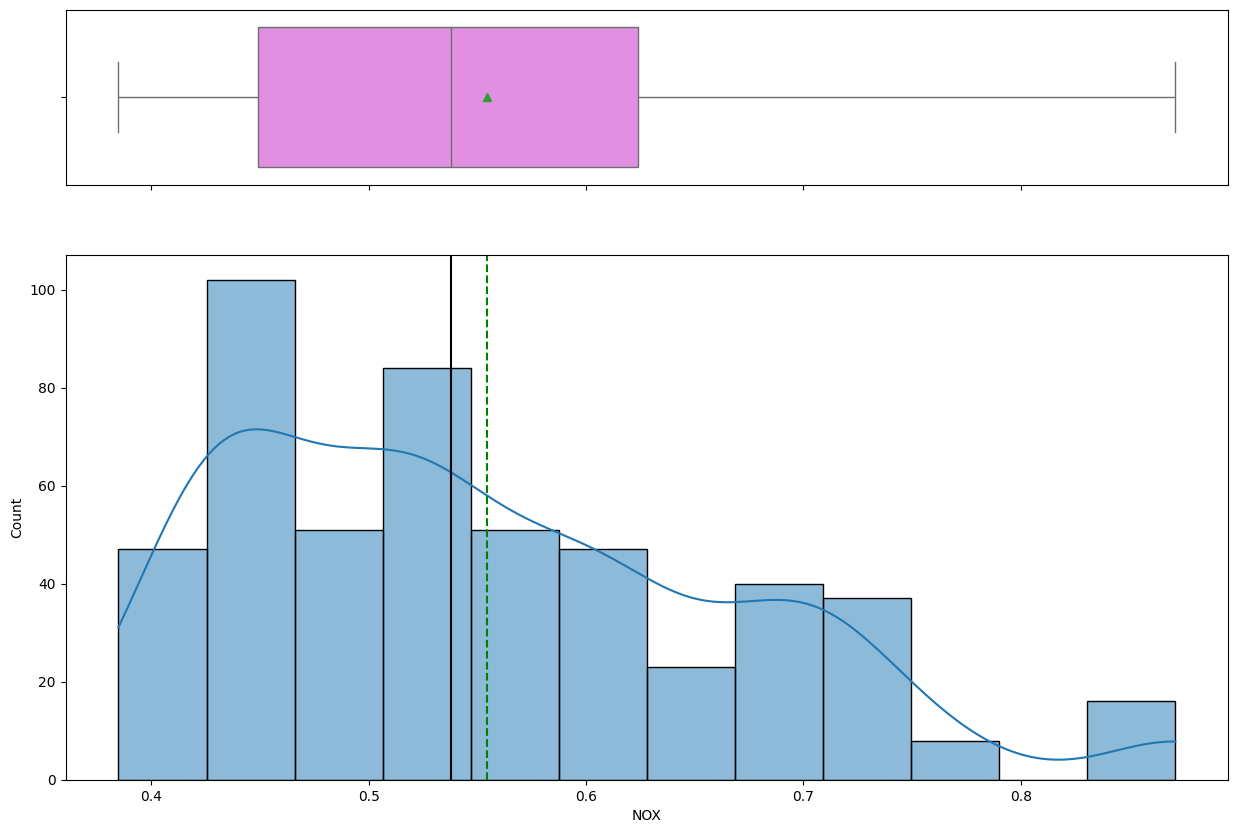

In [28]:
histogram_boxplot(houseing_df ,'NOX')

## Infernce

> Add blockquote


nox: Nitric oxides concentration (parts per 10 million).
The histogram or distribution is right skewed
With median and average between 0.5 to 0.6 indicating the Nox level are low in most of the areas

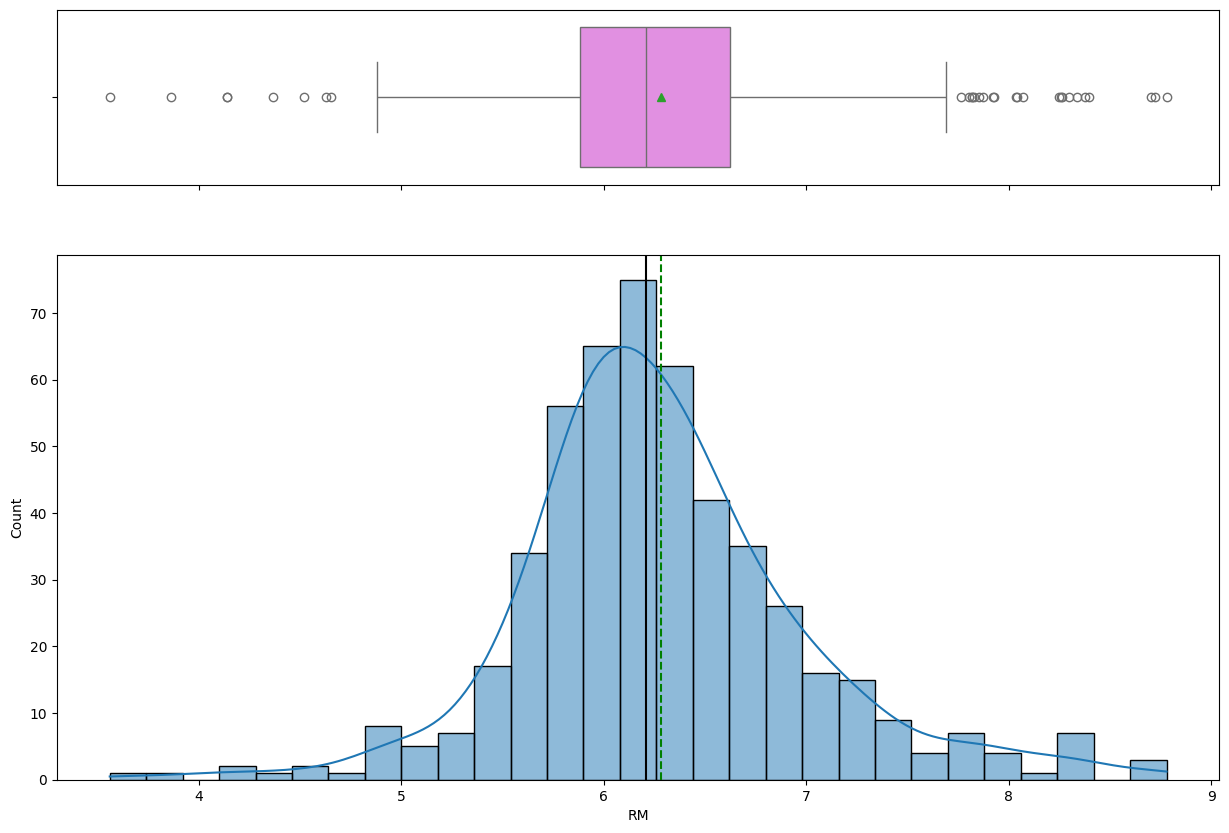

In [29]:
histogram_boxplot(houseing_df ,'RM')

## Infernce
rm: Average number of rooms per dwelling.
Rm variable is almost normally distrubuted which is skewed slightly to the right
Most of the areas have 6.2 to 6.3 rooms

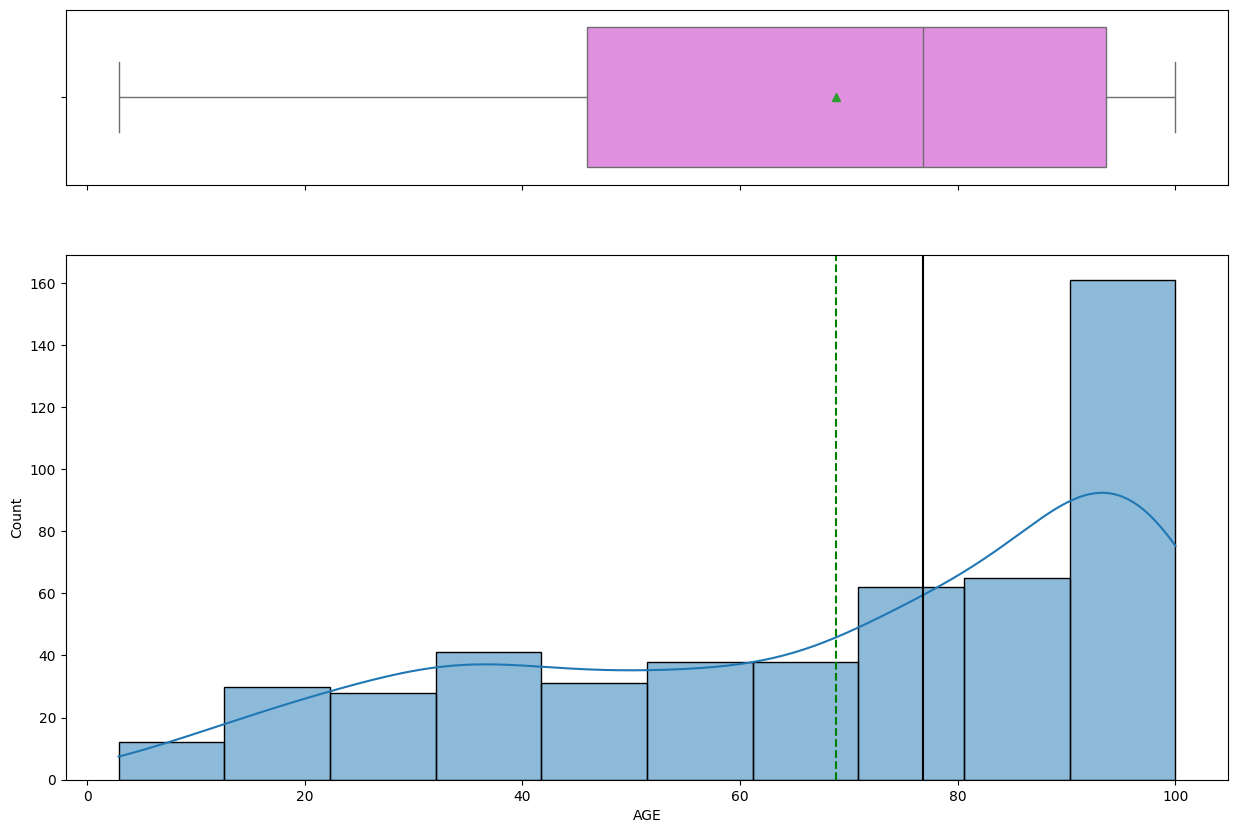

In [30]:
histogram_boxplot(houseing_df ,'AGE')

## Infernce
age: Proportion of owner-occupied units built prior to 1940.
The data is skewed towards left
having max count at 100 , indicating many of the houses are quit old .


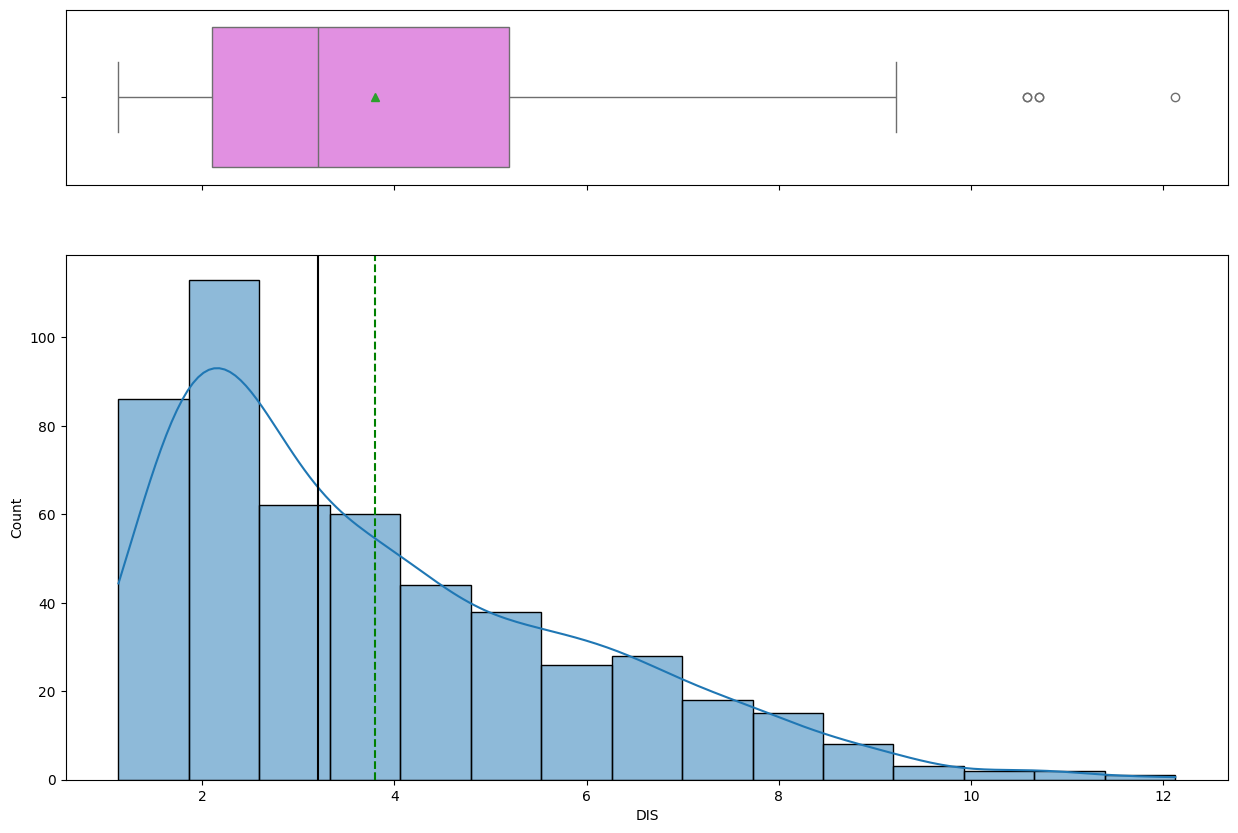

In [31]:
histogram_boxplot(houseing_df ,'DIS')

## Infernce
dis: Weighted distances to five Boston employment centers.
The distribution is skewed right
and mode of the distribution is 2-3 meaning most of the houses are
closer to the employment center


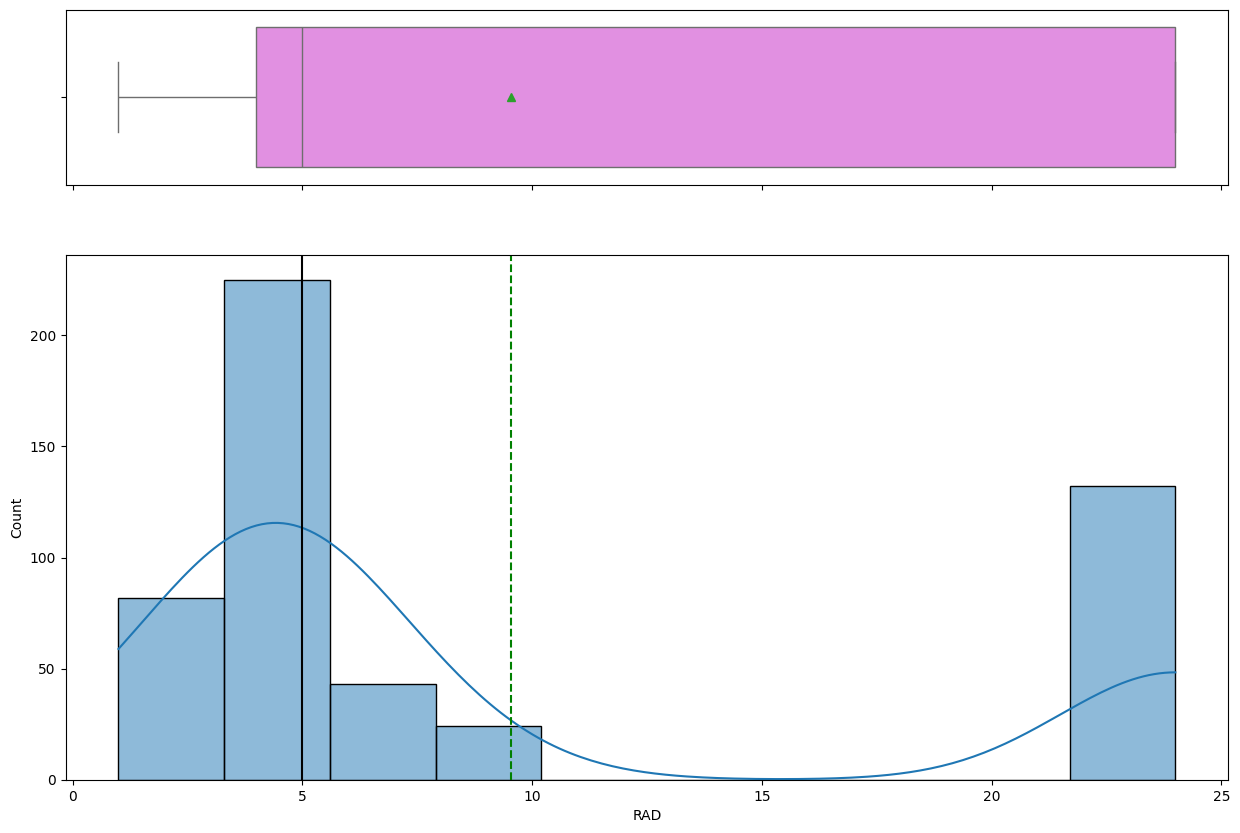

In [32]:
histogram_boxplot(houseing_df ,'RAD')

## Infernce
rad: Index of accessibility to radial highways.
we see a complicated distribution
it has two modes 5 and 22-24 meaning
there are two cluster of houses one who are located near to highways
another cluster who are far away from the radial highways .



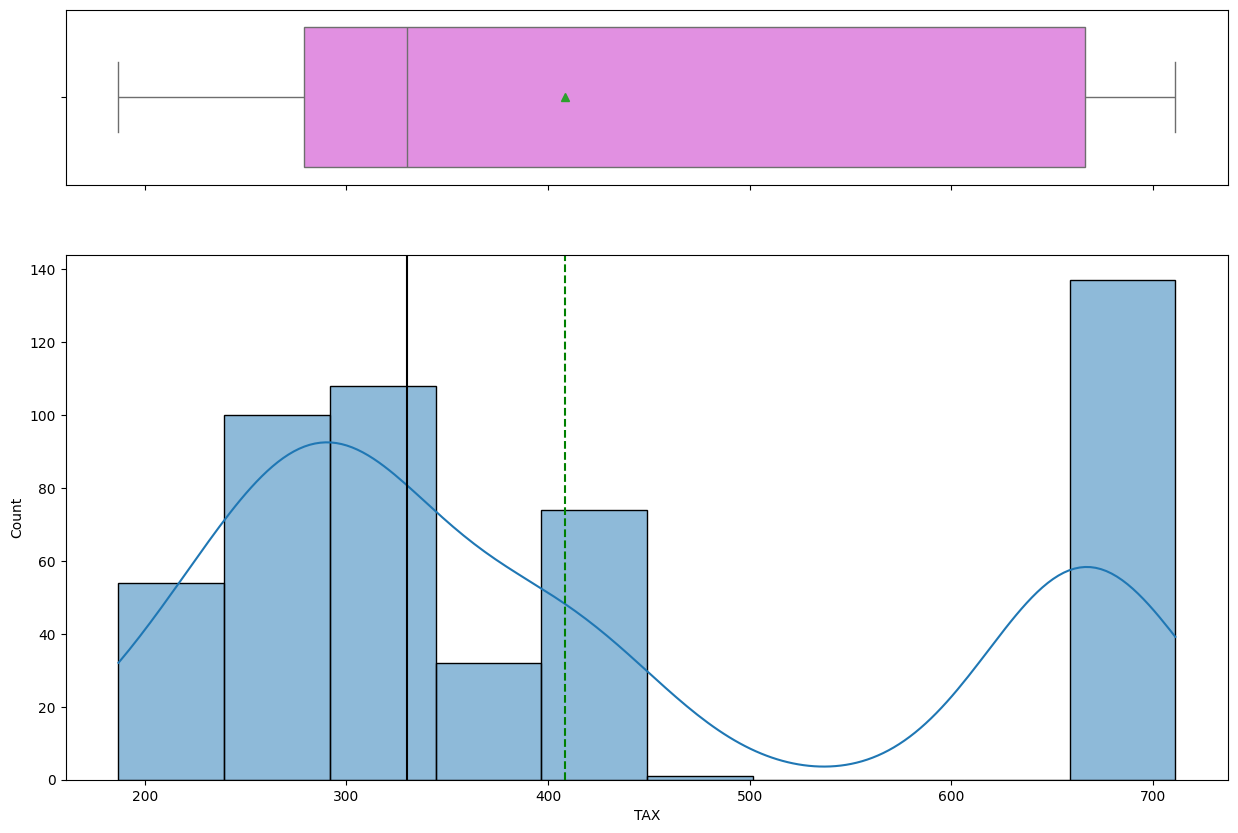

In [33]:
histogram_boxplot(houseing_df ,'TAX')

## Infernce
tax: Full-value property-tax rate per $10,000.
we see a complex distribution with two peaks  ie , meaning two cluster one having are being low tax paying area and one cluster payer high tax paying area

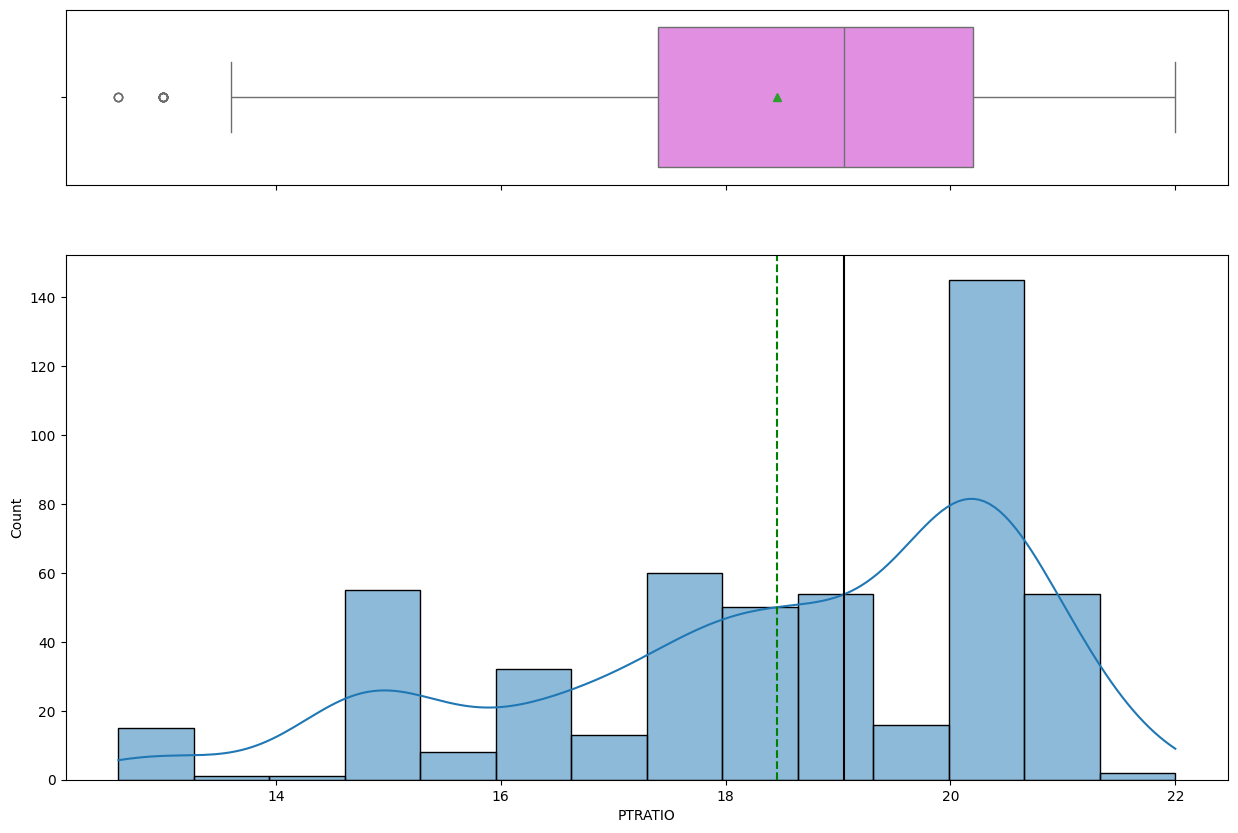

In [34]:
histogram_boxplot(houseing_df ,'PTRATIO')

## Infernce
PTRATIO - pupil-teacher ratio by town
The distribution is left skewed
max PTration is 20 meaning most of the areas have very less teacher than students . meaning their are more childrens or schools have large student population  or more number of students per classroom


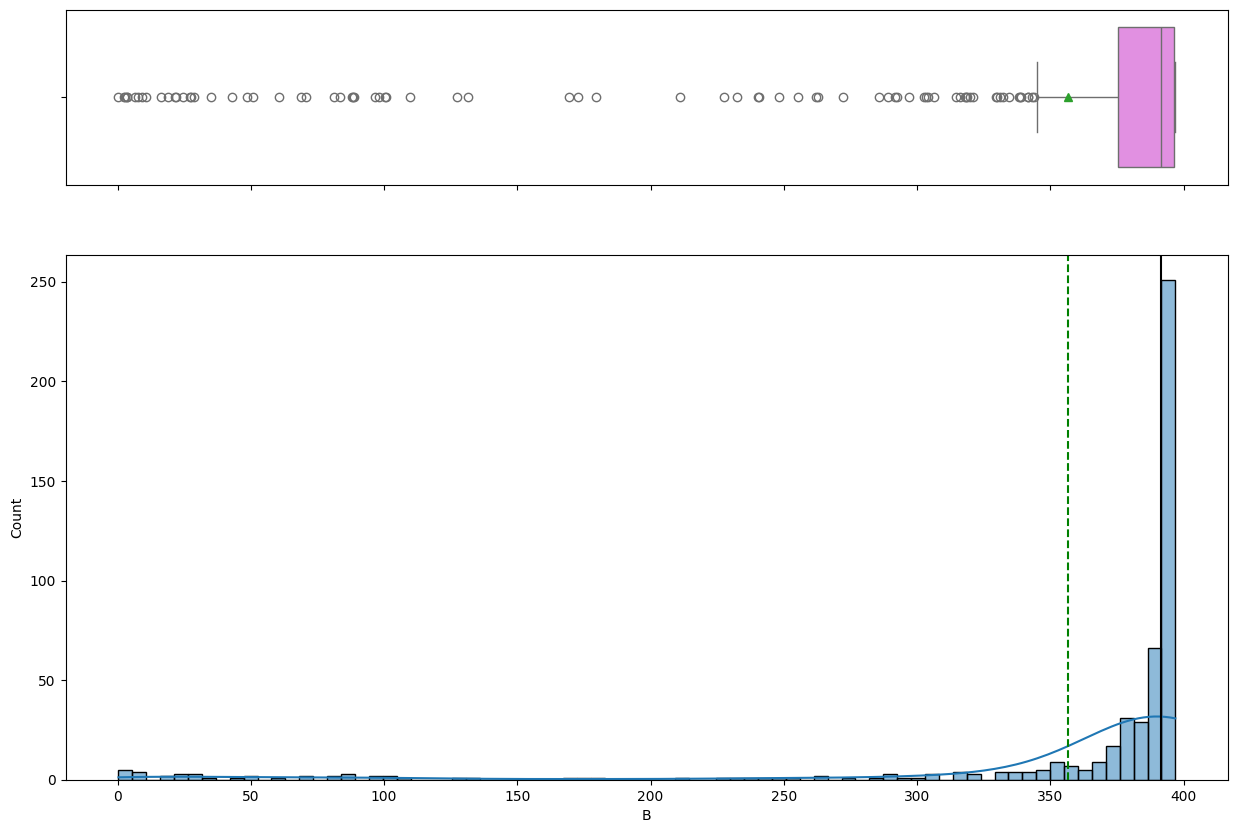

In [35]:
histogram_boxplot(houseing_df ,'B')

## Infernce
B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
The histogram of B (1000 × (Bk − 0.63)²) shows a highly right-skewed distribution, with a large concentration of values near 400. This indicates that in most towns, the proportion of Black residents (Bk) is very close to 0.63.

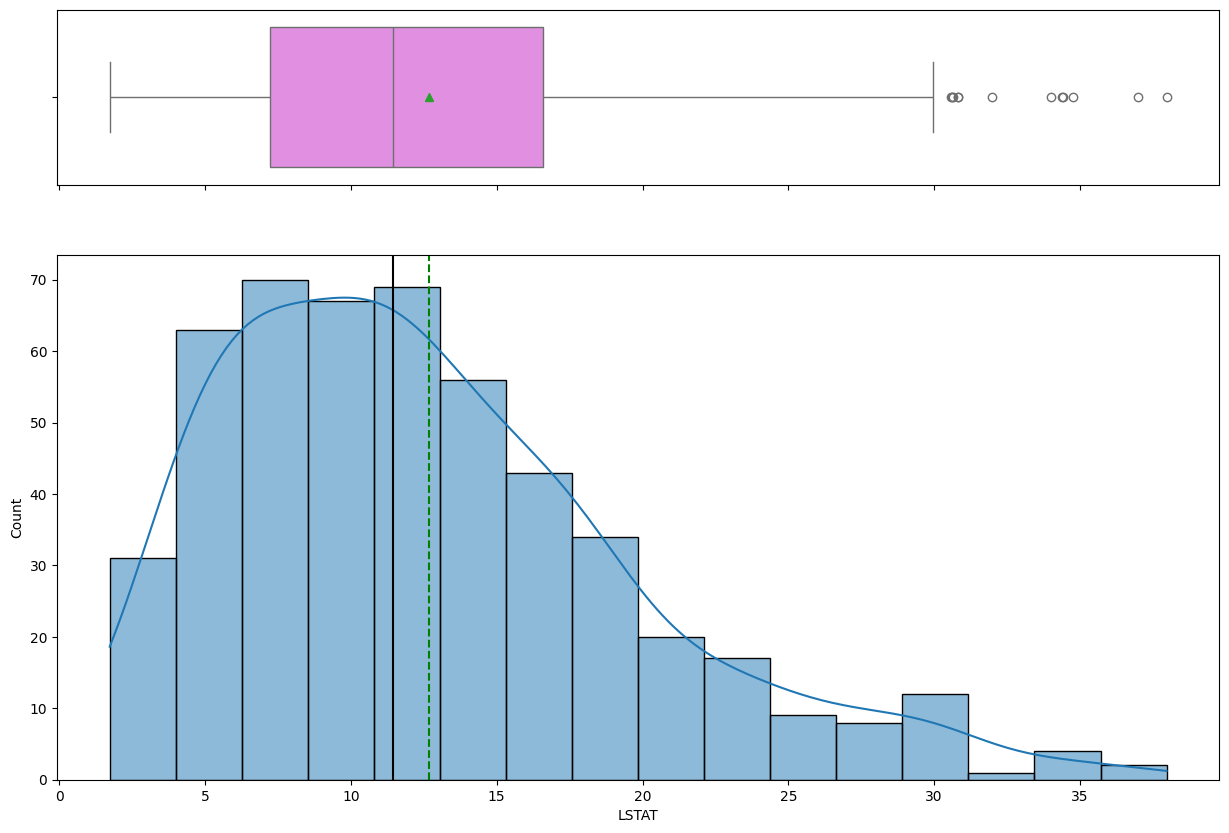

In [36]:
histogram_boxplot(houseing_df ,'LSTAT')

## Infernce
LSTAT - % lower status of the population
"Lower status of the population" generally refers to individuals or groups with less social and economic power, influence, and opportunities compared to those with higher status

The LSTAT distribution is right skewed .
Majority of the count is between 5-15 and these are Low percentage LSTAT
area .
Hence most of the area population are having low social and econimic condition

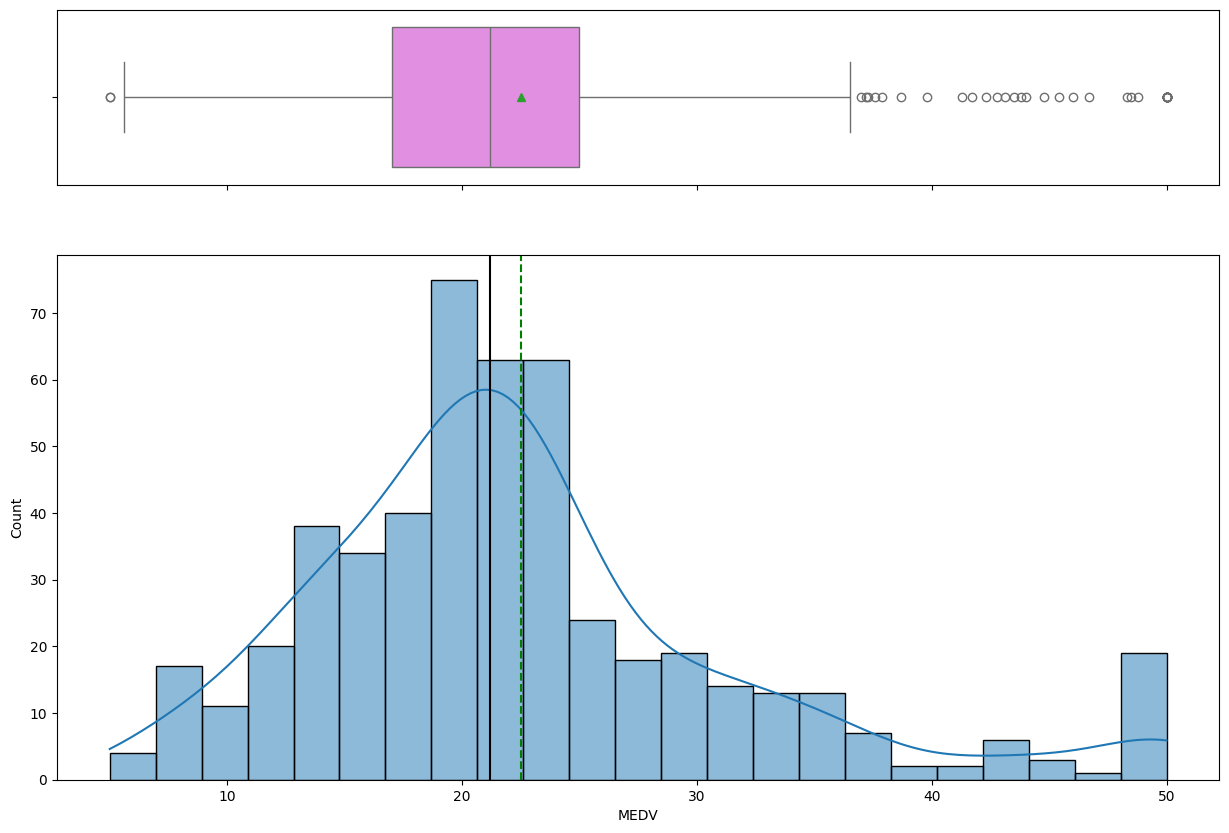

In [37]:
histogram_boxplot(houseing_df ,'MEDV')

##  Infernce
MEDV - Median value of owner-occupied homes in $1000's

* The distrubtion is almost normal and is right skewed

* Most of the  houses are between `$19k -$24k range

* There are few outlier houses more than '50k dollar' are capped at 50k dollar

* This is our target varaible

CHAS

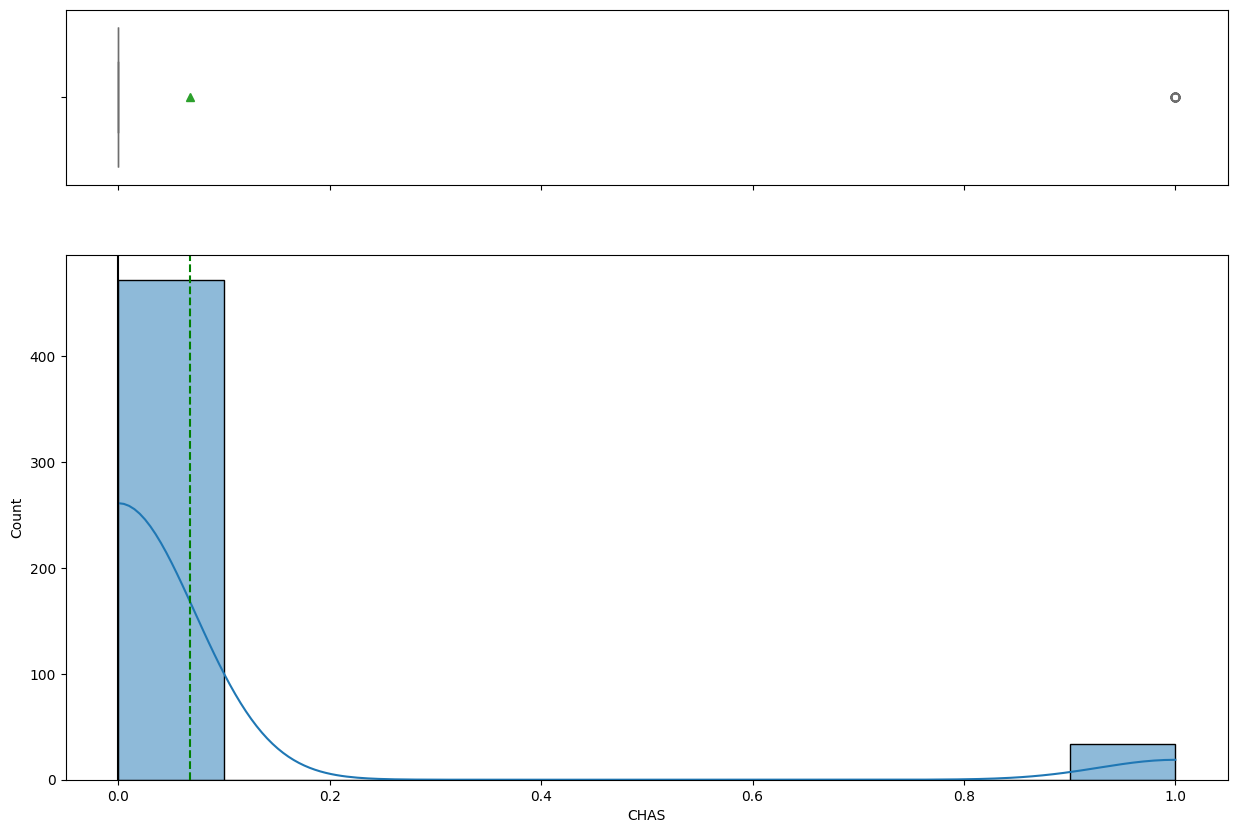

In [38]:
histogram_boxplot(houseing_df ,'CHAS')

##  Infernce
Most of the areas are not near to charles river .
This is a categorical variable

## Bivarate Analysis

## Quantitative vs Quantitave

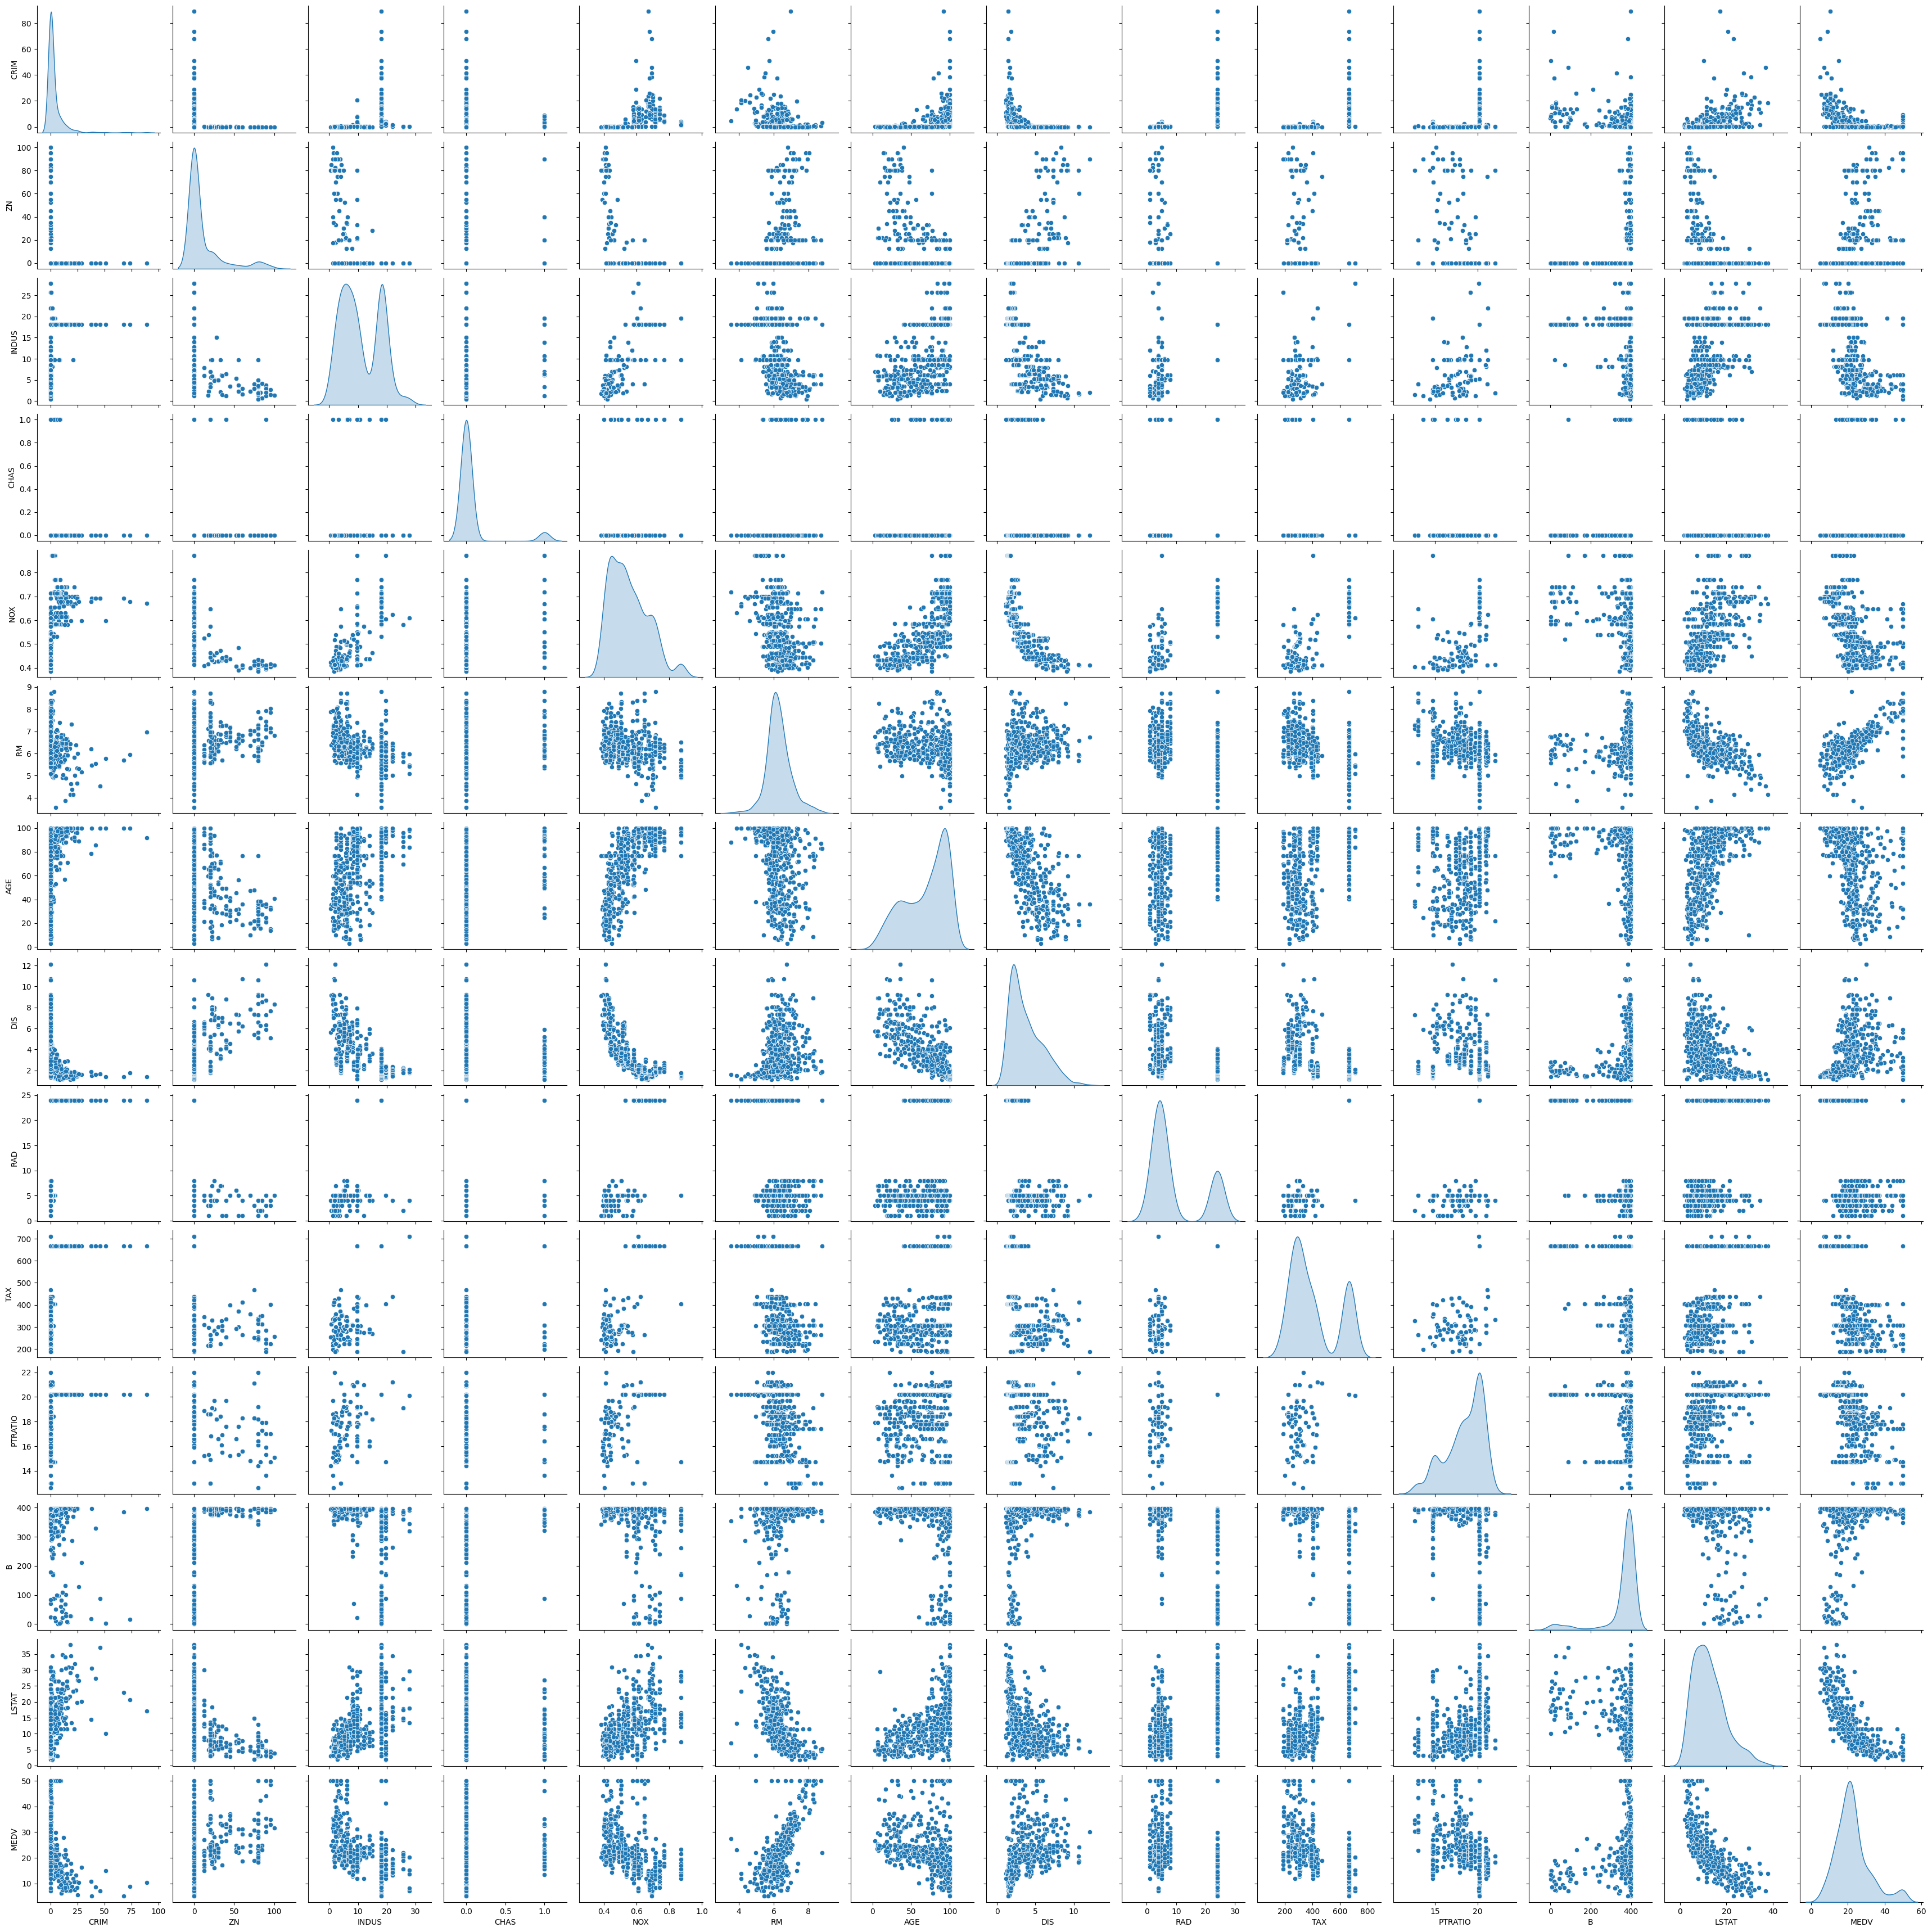

In [39]:
sns.pairplot(data = houseing_df,diag_kind= "kde")


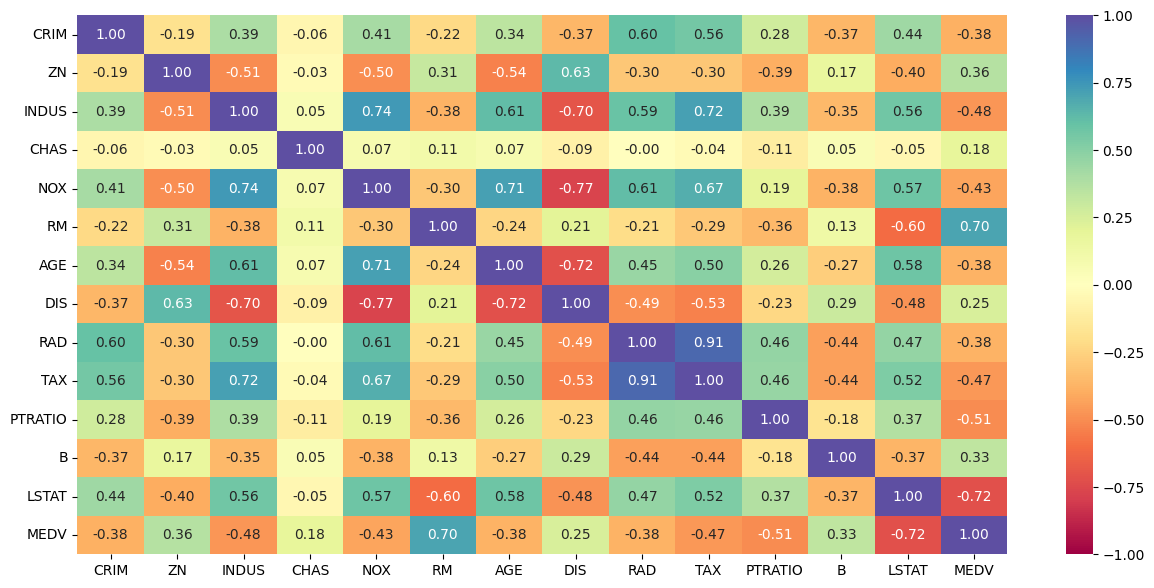

In [40]:
# To create the heatmap, I'll create a list of only the numerical variables
corr_list = houseing_df.select_dtypes(include=np.number).columns.tolist()

# Now let's plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    houseing_df[corr_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Inference
* MEDV : few columns like RM and LSTAT have strong corelation with MDEV , Nox,PTRATIO also have good correlation with MDEV which would mean this predictors will play a vital role in predicting the the Median home value

* Few of the predictors or independent variables are storngly coreleated to each other , which indicates multicolinearity is present , hence we might have to drop few independent variables or create a new one

# Outlier Treatment

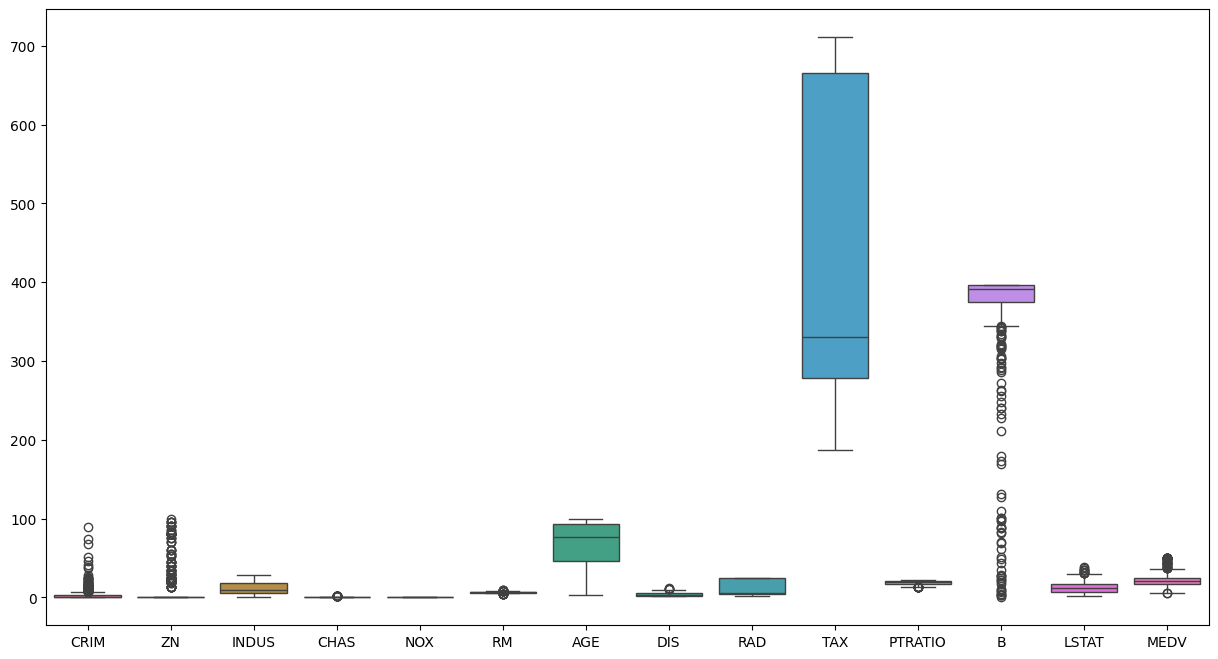

In [41]:
plt.figure(figsize=(15,8))
ax = sns.boxplot( data=houseing_df)

In [42]:
def treat_outliers_iqr(df, column):
    """Treat outliers in a DataFrame column using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to treat outliers in.

    Returns:
        pd.DataFrame: The DataFrame with treated outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR



    # Capping
    capped_df = df.copy()
    capped_df[column] = capped_df[column].clip(lower=lower_bound, upper=upper_bound)

    return capped_df

In [43]:
for col in houseing_df.columns:
    houseing_df = treat_outliers_iqr(houseing_df, col)

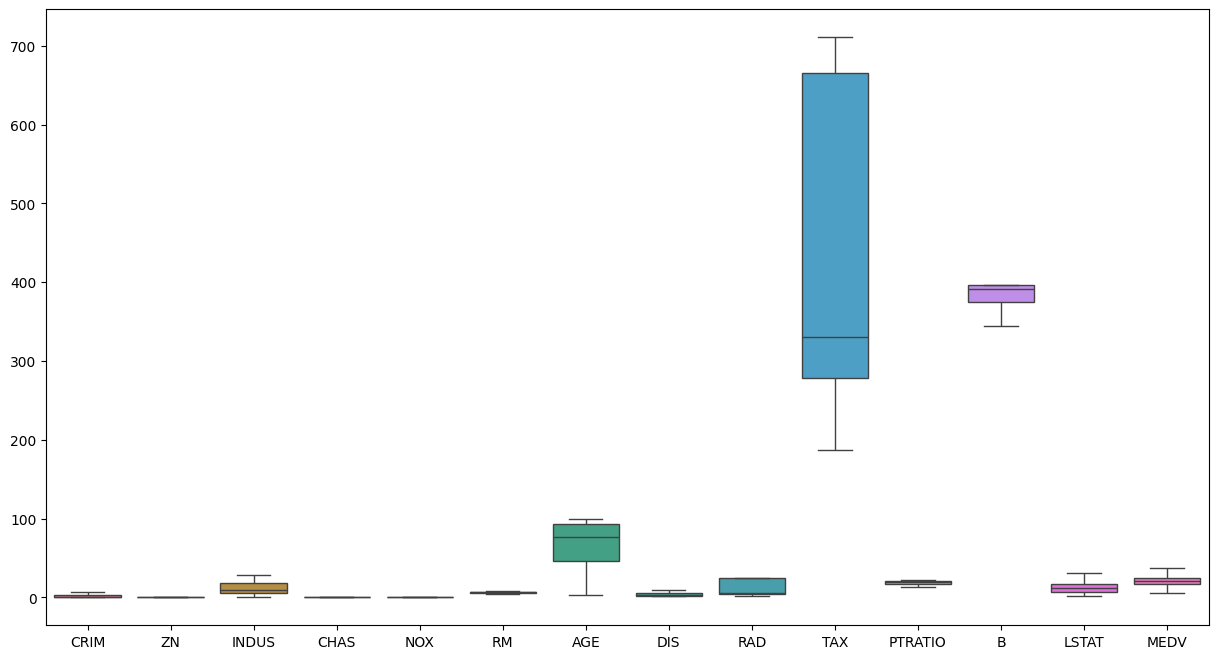

In [44]:
plt.figure(figsize=(15,8))
ax = sns.boxplot( data=houseing_df)

## Inference
The outlier are removed for the Data

# Train Test split

In [45]:
import statsmodels.api as sm
X = houseing_df.drop('MEDV', axis=1)
X = sm.add_constant(X)
y = houseing_df['MEDV']

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

# Training the Linear Model from Statsmodel API

In [47]:
ols_mod = OLS(y_train, X_train)

In [48]:
ols_res = ols_mod.fit()

In [49]:
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     101.3
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          1.74e-100
Time:                        05:21:32   Log-Likelihood:                -959.51
No. Observations:                 354   AIC:                             1943.
Df Residuals:                     342   BIC:                             1989.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0040      6.675      5.993      0.0

# Model summary Inference

1.    R-squared (uncentered): 0.765 which means
then model is able to explain 76% of varation in Y ( dependent variable)

2.   some od the values have high  P>|t| which mean few of the columns are not requird or do not have impact in the outcome of y

# CLRM Assumption

## Multicollinearity

To detect multicollinearity, you can use a few methods: calculating the Variance Inflation Factor (VIF), checking the correlation matrix, and looking for large coefficient changes when adding or removing variables. A VIF greater than 5 or 10, a high correlation between independent variables (often > 0.8 or <-0.8), or significant changes in coefficients when removing a predictor are all indicators of potential multicollinearity.
1. Variance Inflation Factor (VIF)
What it is:
VIF measures how much the variance of a regression coefficient is inflated due to multicollinearity.
How to use it:
Calculate VIF for each independent variable in your model. Values greater than 5 or 10 suggest multicollinearity, according to a few resources https://www.datacamp.com/tutorial/multicollinearity,.
How to interpret:
A higher VIF indicates that the variance of the coefficient is more inflated, making it less reliable.

In [50]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor

In [51]:
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
print("VIF vales : \n {} \n\n".format(vif_series))

VIF vales : 
 const      1151.106635
CRIM          7.487688
ZN                 NaN
INDUS         3.683324
CHAS               NaN
NOX           4.304144
RM            1.830663
AGE           2.796754
DIS           3.484528
RAD          11.600650
TAX           9.032884
PTRATIO       1.733462
B             1.335414
LSTAT         2.662119
dtype: float64 




/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [52]:
# Display VIF

def run_vif ( x ):
  vif_series = pd.Series([variance_inflation_factor(x.values, i) for i in range(x.shape[1])], index=x.columns)
  print("VIF vales : \n {} \n\n".format(vif_series))

A NaN (Not a Number) value in a Variance Inflation Factor (VIF) calculation usually indicates perfect multicollinearity or near-perfect multicollinearity among the independent variables in your regression model. This means one or more of your predictor variables can be perfectly or almost perfectly predicted from the other predictor variables.
Here's a more detailed explanation:

**Lets drop ZN and check the VIF series**


1.   we are going to dropm the columns Zn
2.   Create a new Training set without ZN
3.   Train the model
4.   check the R2 and adj R2 score
5.   keep the zn if it reduces the R2 by a large amount  



In [53]:
x_train_1 = X_train.drop('ZN', axis=1)
ols_mod_1 = OLS(y_train, x_train_1)
ols_res_1 = ols_mod_1.fit()
print("R squared : {} \n".format(ols_res_1.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_1.rsquared_adj))

R squared : 0.76516670197091 

Adj R squared : 0.7576135841980445 




As you can see there is  no difference after droping the ZN , hence we can elminate ZN from our Dataset

In [54]:
run_vif ( x_train_1 )

VIF vales : 
 const      1151.106635
CRIM          7.487688
INDUS         3.683324
CHAS               NaN
NOX           4.304144
RM            1.830663
AGE           2.796754
DIS           3.484528
RAD          11.600650
TAX           9.032884
PTRATIO       1.733462
B             1.335414
LSTAT         2.662119
dtype: float64 




/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


**Lets drop CHAS and check the VIF series**


1.   we are going to dropm the columns CHAS
2.   Create a new Training set without CHAS
3.   Train the model
4.   check the R2 and adj R2 score
5.   keep the CHAS if it reduces the R2 by a large amount  


In [55]:
x_train_2 = x_train_1.drop('CHAS', axis=1)
ols_mod_2 = OLS(y_train, x_train_2)
ols_res_2 = ols_mod_2.fit()
print("R squared : {} \n".format(ols_res_2.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_2.rsquared_adj))

R squared : 0.7651667019709099 

Adj R squared : 0.7576135841980444 




As you can see there is  no difference after droping the CHAS , hence we can elminate CHAS from our Dataset

In [56]:
run_vif ( x_train_2 )

VIF vales : 
 const      1151.106635
CRIM          7.487688
INDUS         3.683324
NOX           4.304144
RM            1.830663
AGE           2.796754
DIS           3.484528
RAD          11.600650
TAX           9.032884
PTRATIO       1.733462
B             1.335414
LSTAT         2.662119
dtype: float64 




**Lets drop RAD and check the VIF series**


1.   we are going to dropm the columns RAD
2.   Create a new Training set without RAD
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the RAD if it reduces the R2 by a large amount  


In [57]:
x_train_3 = x_train_2.drop('RAD', axis=1)
ols_mod_3 = OLS(y_train, x_train_3)
ols_res_3 = ols_mod_3.fit()
print("R squared : {} \n".format(ols_res_3.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_3.rsquared_adj))

R squared : 0.7576790152002171 

Adj R squared : 0.7506142634567832 




As you can see there is  no difference after droping the RAD , hence we can elminate RAD from our Dataset

In [58]:
run_vif ( x_train_3 )

VIF vales : 
 const      1123.480657
CRIM          4.678269
INDUS         3.515960
NOX           4.303660
RM            1.802455
AGE           2.791286
DIS           3.472986
TAX           5.454938
PTRATIO       1.642786
B             1.335336
LSTAT         2.646744
dtype: float64 




**Lets drop CRIM and check the VIF series**


1.   we are going to dropm the columns CRIM
2.   Create a new Training set without RADCRIM
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the CRIM if it reduces the R2 by a large amount  


In [59]:
x_train_4 = x_train_3.drop('CRIM', axis=1)
ols_mod_4 = OLS(y_train, x_train_4)
ols_res_4 = ols_mod_4.fit()
print("R squared : {} \n".format(ols_res_4.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_4.rsquared_adj))

R squared : 0.7571570803691493 

Adj R squared : 0.7508036318904352 




As you can see there is  no difference after droping the CRIM , hence we can elminate RAD from our Dataset

In [60]:
run_vif ( x_train_4 )

VIF vales : 
 const      1108.806024
INDUS         3.424953
NOX           4.174630
RM            1.792714
AGE           2.788754
DIS           3.462393
TAX           2.833244
PTRATIO       1.639163
B             1.329540
LSTAT         2.539536
dtype: float64 




**Lets drop NOX and check the VIF series**


1.   we are going to dropm the columns NOX
2.   Create a new Training set without NOX
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the NOX if it reduces the R2 by a large amount  


In [61]:
x_train_5 = x_train_4.drop('NOX', axis=1)
ols_mod_5 = OLS(y_train, x_train_5)
ols_res_5 = ols_mod_5.fit()
print("R squared : {} \n".format(ols_res_5.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_5.rsquared_adj))

R squared : 0.7441582933897868 

Adj R squared : 0.7382257320770862 




As you can see there is  no difference ( just 1% dropin R2 )  after droping the NOX , hence we can elminate NOX from our Dataset b

In [62]:
run_vif ( x_train_5 )

VIF vales : 
 const      880.408954
INDUS        3.282681
RM           1.774029
AGE          2.673987
DIS          2.976709
TAX          2.490016
PTRATIO      1.485949
B            1.313029
LSTAT        2.521527
dtype: float64 




**Lets drop INDUS and check the VIF series**


1.   we are going to dropm the columns INDUS
2.   Create a new Training set without INDUS
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the INDUS if it reduces the R2 by a large amount  


In [63]:
x_train_6= x_train_5.drop('INDUS', axis=1)
ols_mod_6 = OLS(y_train, x_train_6)
ols_res_6 = ols_mod_6.fit()
print("R squared : {} \n".format(ols_res_6.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_6.rsquared_adj))

R squared : 0.7402076025518298 

Adj R squared : 0.73495168699652 




As you can see there is  no difference after droping the INDUS , hence we can elminate INDUS from our Dataset

In [64]:
run_vif ( x_train_6 )

VIF vales : 
 const      831.559727
RM           1.712465
AGE          2.664576
DIS          2.460206
TAX          2.034109
PTRATIO      1.483148
B            1.296328
LSTAT        2.519533
dtype: float64 




**Lets drop AGE and check the VIF series**


1.   we are going to dropm the columns AGE
2.   Create a new Training set without AGE
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the AGE
 if it reduces the R2 by a large amount  


In [65]:
x_train_7= x_train_6.drop('AGE', axis=1)
ols_mod_7 = OLS(y_train, x_train_7)
ols_res_7 = ols_mod_7.fit()
print("R squared : {} \n".format(ols_res_7.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_7.rsquared_adj))

R squared : 0.7357008585156695 

Adj R squared : 0.7311308445418769 




As you can see there is  no difference ( just 1% dropin R2 )  after droping the AGE , hence we can elminate AGE from our Dataset

In [66]:
run_vif ( x_train_7 )

VIF vales : 
 const      816.201791
RM           1.689839
DIS          1.619183
TAX          2.033814
PTRATIO      1.481658
B            1.293424
LSTAT        2.184963
dtype: float64 




**Lets drop LSTAT and check the VIF series**


1.   we are going to dropm the columns LSTAT
2.   Create a new Training set without LSTAT
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the LSTAT
 if it reduces the R2 by a large amount  


In [67]:
x_train_8= x_train_7.drop('LSTAT', axis=1)
ols_mod_8 = OLS(y_train, x_train_8)
ols_res_8 = ols_mod_8.fit()
print("R squared : {} \n".format(ols_res_8.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_8.rsquared_adj))

R squared : 0.6174184631497124 

Adj R squared : 0.6119216019880703 




As you can see that the R2 dropped from 74 to 61 when we removed LSTAT that implies that LSTAT is a important predictor for MDEV

In [68]:
run_vif ( x_train_7 )

VIF vales : 
 const      816.201791
RM           1.689839
DIS          1.619183
TAX          2.033814
PTRATIO      1.481658
B            1.293424
LSTAT        2.184963
dtype: float64 




**Lets drop TAX and check the VIF series**


1.   we are going to dropm the columns TAX
2.   Create a new Training set without TAX
3.   Train the model
4.   check the R2 and adj R2 score

5.   keep the TAX
 if it reduces the R2 by a large amount  


In [69]:
x_train_9= x_train_7.drop('TAX', axis=1)
ols_mod_9 = OLS(y_train, x_train_7)
ols_res_9 = ols_mod_9.fit()
print("R squared : {} \n".format(ols_res_9.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_9.rsquared_adj))

R squared : 0.7357008585156695 

Adj R squared : 0.7311308445418769 




As you can see there is  no difference after droping the TAX , hence we can elminate TAX from our Dataset

In [70]:
run_vif ( x_train_9 )

VIF vales : 
 const      798.564303
RM           1.655847
DIS          1.410099
PTRATIO      1.238841
B            1.186568
LSTAT        2.097165
dtype: float64 




## Conclusion
**
1.  we see that VIF values for all the x variables is less than 2 that means to say that we have removed multicollinearity
2.  LSTAT vif value 2.09 is important predictor ,since dropping LSTAT the R2 score dropped from 73 to 61


**

In [71]:
x_train_9= x_train_7.drop('TAX', axis=1)
ols_mod_9 = OLS(y_train, x_train_7)
ols_res_9 = ols_mod_9.fit()
print("R squared : {} \n".format(ols_res_9.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_9.rsquared_adj))

R squared : 0.7357008585156695 

Adj R squared : 0.7311308445418769 




In [72]:
print(ols_res_9.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           4.51e-97
Time:                        05:21:33   Log-Likelihood:                -980.43
No. Observations:                 354   AIC:                             1975.
Df Residuals:                     347   BIC:                             2002.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0360      5.920      3.216      0.0



1.   R2 Score is 73% that means we are able to explain 73% of variation in dependent variable

2.   Using VIF method we have removed  multicollinearity




## Eliminate the columns/variables with High P value

In regression analysis, P>|t|, also known as the p-value, represents the probability of observing a t-statistic as extreme as, or more extreme than, the one calculated from the data, assuming the null hypothesis is true. Essentially, it indicates the likelihood that the relationship between a predictor variable and the response variable is due to random chance. A small p-value (typically below 0.05) suggests a statistically significant relationship, meaning the predictor is likely a meaningful addition to the model.
Here's a more detailed breakdown:
1. The Null Hypothesis: In regression, the null hypothesis for each coefficient (except the intercept) is that the true population coefficient is zero. This implies there's no relationship between that predictor and the response variable.

In [73]:
print(ols_res_9.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           4.51e-97
Time:                        05:21:33   Log-Likelihood:                -980.43
No. Observations:                 354   AIC:                             1975.
Df Residuals:                     347   BIC:                             2002.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0360      5.920      3.216      0.0

In [74]:
x_train_10= x_train_7.drop('B', axis=1)
ols_mod_10 = OLS(y_train, x_train_10)
ols_res_10 = ols_mod_10.fit()
print("R squared : {} \n".format(ols_res_10.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_10.rsquared_adj))

R squared : 0.734523836242092 

Adj R squared : 0.730709523544421 




In [75]:
print(ols_res_10.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     192.6
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           6.65e-98
Time:                        05:21:33   Log-Likelihood:                -981.22
No. Observations:                 354   AIC:                             1974.
Df Residuals:                     348   BIC:                             1998.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.5282      3.943      6.220      0.0

## Conclusion
As you can see there is  no difference in R2 after droping the "B" , hence we can elminate "B" from our Dataset


# Assumptions of Linear Regression


1.   Linearity
2.   Independence
3.   Homocedacity
4.   Normallity of error term
5.   No strong multicollinearity


In [76]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten() # actual values
df_pred["predicted Values"] = ols_res_10.fittedvalues.values # predicted values
df_pred["Residuals"] = ols_res_10.resid.values  # residuals

In [77]:
df_pred.head()

,Actual Values,predicted Values,Residuals
0,20.4,21.896593,-1.496593
1,16.0,18.840983,-2.840983
2,13.3,16.900740,-3.600740
3,30.8,28.248717,2.551283
4,27.5,18.000966,9.499034


## Test for Linearity and Independence

### linearity assumption
1.   The linearity assumption in regression analysis states that the relationship between the predictor(s) and the response variable is linear. This means that a change in the independent variable should result in a proportional change in the dependent variable. If this assumption is violated, the regression model may not accurately capture the true relationship and lead to biased predictions.
Elaboration:

2.   If the relationship is not linear, the regression line will not accurately capture the trend in the data. This can lead to inaccurate predictions and potentially misleading conclusions.


3.  Scatterplots: Visualizing the data using scatterplots can help determine if the relationship appears linear or if it's curved.
4.  Residual plots: Plotting the residuals (the difference between the actual and predicted values) against the predicted values can help identify patterns that suggest non-linearity.

### Independence
1.  In linear regression, the independence assumption posits that the errors (or residuals) in your model should not be correlated with each other. This means that knowing the error for one data point shouldn't give you any information about the error for another data point. Essentially, observations should be independent, meaning one data point doesn't influence another

2.  Durbin-Watson Test: This test can be used to check for autocorrelation (a form of correlation) in the residuals.
3.  Residual Plots: Examining plots of residuals against time (if applicable) or against predicted values can reveal patterns or trends.


### Lets plot the residuals plot



Text(0, 0.5, 'Residuals')

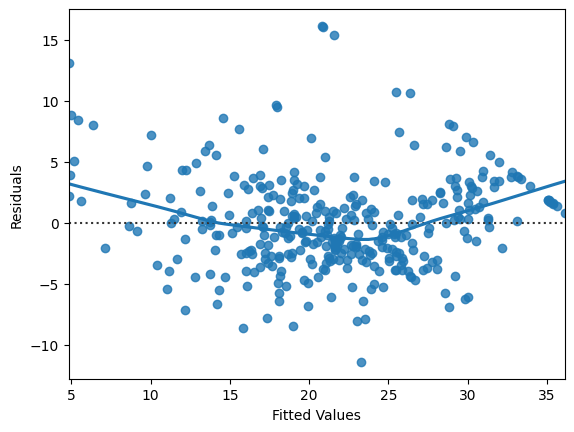

In [78]:
sns.residplot( data= df_pred , x = "predicted Values" , y = "Residuals",lowess= True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

we  are seeing kind of " U " pattern , hence lets check the independent variable from where we might be getting this non linearity

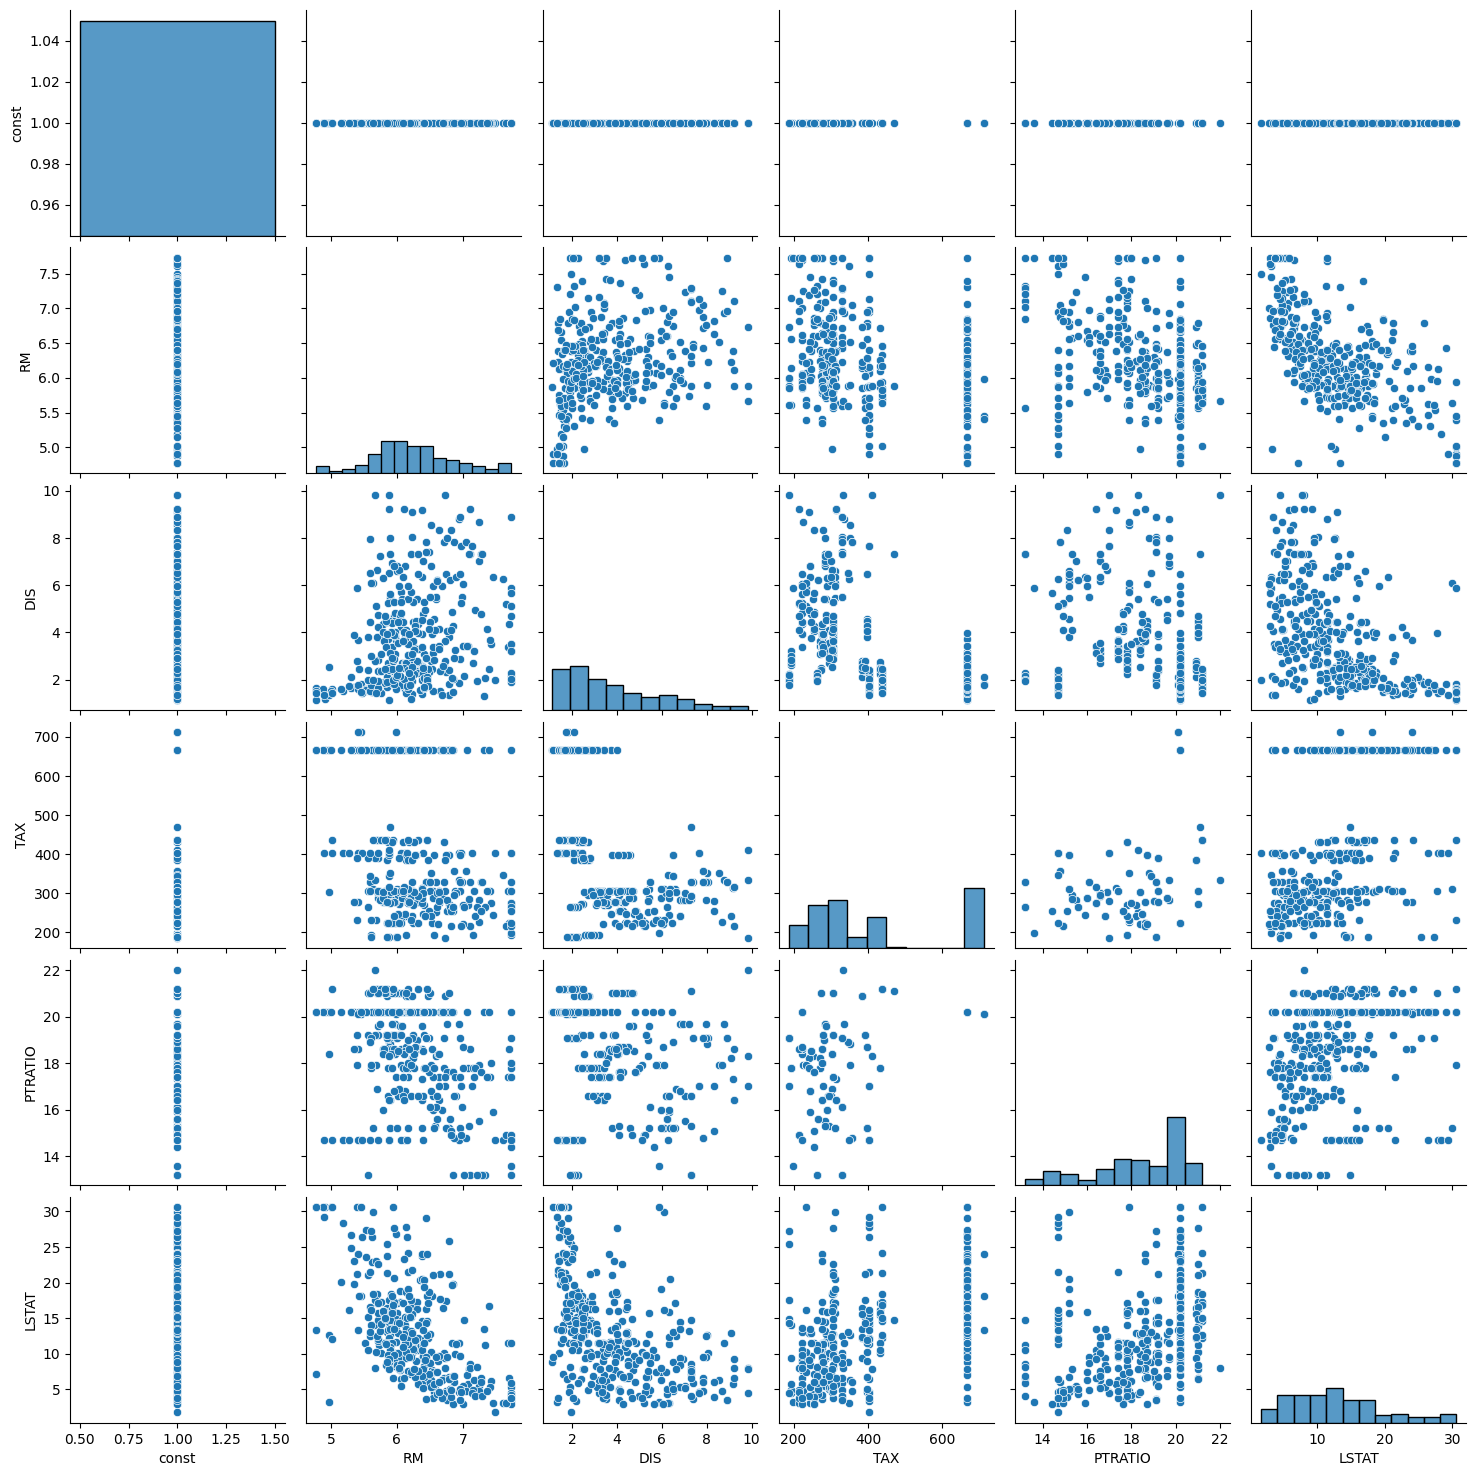

In [79]:
sns.pairplot( data =x_train_10 )

In [80]:
x_train_11 = x_train_10.copy()

In [81]:
# using square transformation
x_train_11["RM_sq"] = np.square(x_train_11["RM"])

ols_mod_11 = OLS(y_train, x_train_11)
ols_res_11 = ols_mod_11.fit()
print("R squared : {} \n".format(ols_res_11.rsquared))
print("Adj R squared : {} \n\n".format(ols_res_11.rsquared_adj))

R squared : 0.778343364710812 

Adj R squared : 0.7745106851380883 




In [82]:
df_pred2 = pd.DataFrame()

df_pred2["Actual Values"] = y_train.values.flatten() # actual values
df_pred2["predicted Values"] = ols_res_11.fittedvalues.values # predicted values
df_pred2["Residuals"] = ols_res_11.resid.values  # residuals

Text(0, 0.5, 'Residuals')

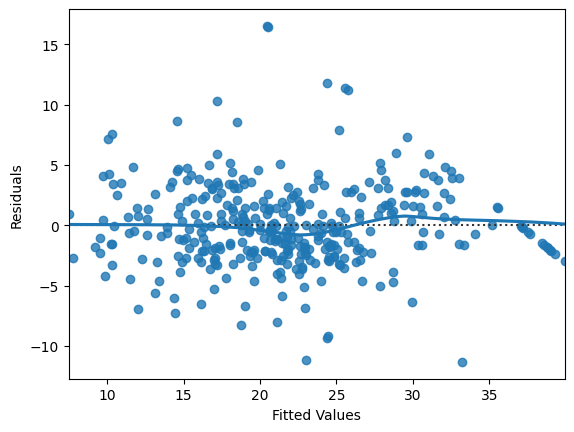

In [83]:
sns.residplot( data= df_pred2 , x = "predicted Values" , y = "Residuals",lowess= True)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

### Conclusion
we see that their is no pattern in residuals ,


*   If the residuals exhibit a pattern (e.g., a curve, a fan shape, or a funnel shape), it suggests that the model is not capturing some systematic relationship in the data. This means the linear model may not be the best fit, and other models or transformations might be needed.
*   A random pattern of residuals, where they are scattered randomly around the horizontal axis (residual = 0), suggests that the model is appropriately capturing the underlying relationship in the data. The model is not systematically over- or under-predicting, and the errors are random and unpredictable



# Test for Normality

1.  The assumption is that error terms are normally distributed.

1.  If the error terms are not normally distributed, confidence intervals may become too wide or too narrow, which leads to difficulty in estimating coefficients based on the least squares method.

1.  Non-normality indicates that there are a few unusual data points, such as outliers or capping, present in the data.

1.  Check for normality by plotting the residuals using a histogram and a Q-Q plot.

1.  How to make residuals normally distributed → apply a transformation.

<Axes: ylabel='Count'>

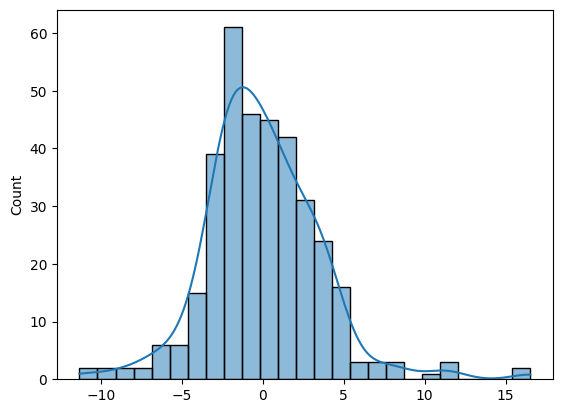

In [84]:
sns.histplot( ols_res_11.resid,kde = True)

### Lets plot QQ plot

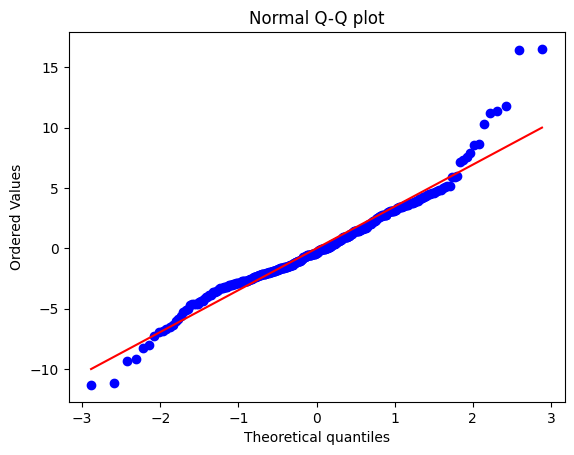

In [85]:
import pylab
import scipy.stats as stats

stats.probplot(ols_res_11.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

The Shaprio-wilk test can also be used for checking the normality , The null and alternate hypotheses of the test are as follow

Null Hypothesis:
* The Shapiro-Wilk test assumes the data is normally distributed, and the test aims to disprove this assumption.
* P-value Interpretation:
1.  p > 0.05: The data is likely normally distributed.
2.  p <= 0.05: The data likely does not follow a normal distribution.

In [86]:
stats.shapiro(ols_res_11.resid)

ShapiroResult(statistic=np.float64(0.9538829546004988), pvalue=np.float64(4.3536478448735025e-09))

* 4.3536478448735025e-09 is scientific notation for
0.0000000043536478448735025
* since p-value < 0.05
* Null Hypothesis (H₀): The data follows a normal distribution.
* Alternative Hypothesis (H₁): The data does not follow a normal distribution.
* When the p-value < 0.05 in a Shapiro-Wilk test, it means:
You reject the null hypothesis.

Conclusion: The data is not normally distributed.

### Conclusion:

* Central alignment: The majority of the data points lie along the red line in the center of the plot. This indicates that the central part of the data follows a roughly normal distribution.

Tails deviation:

* Right Tail (upper-right corner): Data points deviate upward from the line, suggesting positive/right skewness or heavy tails.

* Left Tail (lower-left corner): Data points also deviate downward, reinforcing the idea of non-normal behavior in the tails.

* While the central portion of the data is approximately normal, the extreme values deviate significantly from normality. This suggests that the data may have outliers or heavier tails than a normal distribution, indicating potential non-normality in the distribution, especially in the tails

**Even though the residuals are not strictly normally distributed, this is still acceptable in our case because our goal is prediction, not strict statistical inference. Unlike statisticians who often focus on validating assumptions for hypothesis testing, data scientists are more concerned with the predictive performance of the model**

Minor violations of normality in residuals are common and do not invalidate a regression model aimed at making predictions. It's a pragmatic trade-off in data science — prioritize model performance over textbook assumptions.

## Test for Homoscedasticity
* Homoscedasticity, in statistics, refers to the assumption that the variance of the error term in a regression model is constant across all levels of the independent variables. In simpler terms, it means the spread of the data points around the regression line is roughly the same, regardless of the value of the predictor variable.
* Heteroscedasticity:
The spread of data points around the regression line varies. It might be narrow at some points and wide at others, indicating unequal variance.

* Ther presence of non constant variance in the error terms results in Heteroscedasticity , which is result of presence of outliers

* We can use Goldfeld-Quandt Test to check if Heteroscedasticity is present

* Addressing Heteroscedasticity
1.  If you detect heteroscedasticity, you can consider the following approaches:
Transforming the Dependent Variable: Applying transformations like logarithms or square roots can help stabilize the variance.
1.  Using Weighted Least Squares (WLS): WLS assigns different weights to each observation based on the variance of its error.
1.  Robust Standard Errors: These standard errors are less sensitive to heteroscedasticity.*

Assumptions of Goldfeld-Quandt Test

data is normally distributed.
Null and Alternate Hypothesis of Goldfeld-Quandt Test

* Null Hypothesis: Heteroscedasticity is not present.

* Alternate Hypothesis: Heteroscedasticity is present.

In [88]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(ols_res_11.resid, x_train_11)
lzip(name, test)

[('F statistic', np.float64(0.9738445759879469)),
 ('p-value', np.float64(0.5684878527866275))]

### Conclusion
Your p-value = 0.5685, which is much greater than 0.05.
which mean we fail to reject Null hypothesis , ie Heteroscedasticity is not present.

# All The assumptions of linear regression are now satisfied , Lets check the summary of our final model

In [90]:
print(ols_res_11.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     203.1
Date:                Tue, 24 Jun 2025   Prob (F-statistic):          2.78e-110
Time:                        05:29:55   Log-Likelihood:                -949.29
No. Observations:                 354   AIC:                             1913.
Df Residuals:                     347   BIC:                             1940.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.4767     13.873      9.765      0.0

## Summary Explanation :
* R-squared: 0.778* Model is able to explain 77.8% of the variance in the dependent variable y
*  Prob (F-statistic): 2.78e-110 is ~~ 0 hence the model is statistically significat

* At lower values of RM, adding rooms decreases value (RM is negative).

But the positive RM_sq shows that beyond a certain point, more rooms increase price rapidly.

This suggests a U-shaped or inverted U-shaped relationship depending on the net


# Suggestion for Business
* Choose homes with a balanced number of rooms — too few or too many might not always be optimal.

* Avoid areas with:



 1.   High TAX
2.   High PTRATIO
2.   High LSTAT







Consider that room count’s effect on price is non-linear — more rooms don’t always mean more value unless beyond a threshold.

